In [2]:
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import csv , warnings
import Gaussian_Power_Model
import Cosine_Power_Model

In [3]:
datasheet = 'Nichia.csv'
file = csv.reader(open(datasheet))
angle = np.linspace(-90 , 90 , 181*10)
theta = angle*np.pi/180
data = []
x_axis = []
x_axis_rad = []
y_axis = []
Power = []

for row in file:
    data.append([float(row[0]),float(row[1])])

data.sort(key = lambda x: x[0])

for item in data :
    x_axis_rad.append(item[0]*np.pi/180)
    x_axis.append(item[0])
    y_axis.append(item[1])

bound = [[.01 , [0 , 1] , [0 ,90] , [0 , 90]] , [.02 ,[0,.2] , [0 , 90] , [0 , 90]] , [.02, [0 , 0.2] , [0 ,90] , [0 , 90]] , [.02,[0 , 0.2] , [0 ,90] , [0 , 90]]]

Power , Error , Param = Gaussian_Power_Model.model_fit(x_axis , y_axis , .02 , bound)

RMSE: 0.03948521946643348
R-squared: 0.9874792768130162

RMSE: 0.024632850365111533
R-squared: 0.9948002475730248

RMSE: 0.022464682013321705
R-squared: 0.996062684927615

RMSE: 0.019423592612572857
R-squared: 0.9969812959712271



Model Variables
	   g1 		   g2 		   g3
1. 	 9.621e-01 	 0.000e+00 	 2.564e+01 
2. 	 9.470e-02 	 5.433e+01 	 1.210e+01 
3. 	 3.760e-02 	 3.176e+00 	 3.841e+00 
4. 	 2.222e-02 	 2.000e+01 	 2.000e+01 


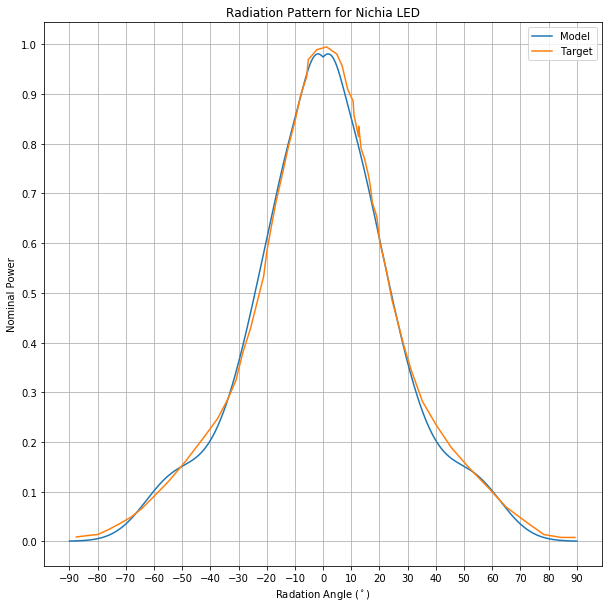

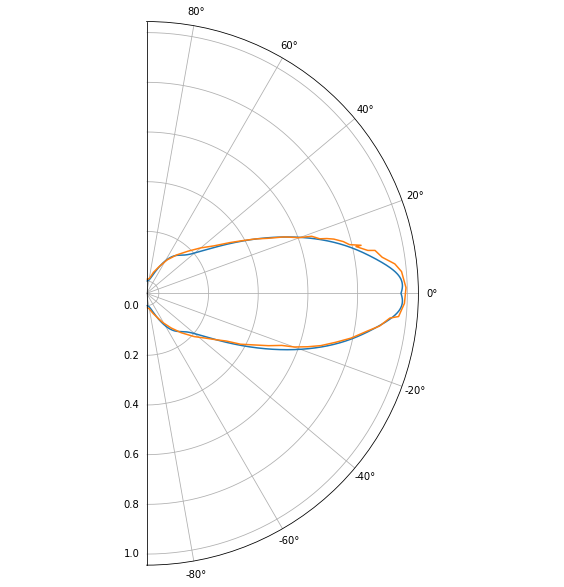

In [4]:
g1 , g2 ,g3 = Gaussian_Power_Model.model_param(Param)
ModelPrediction = Gaussian_Power_Model.I_calc_gauss2(theta , g1 , g2 , g3 )

print("Model Variables")
print("\t   g1 \t\t   g2 \t\t   g3")
for i in range(len(g1)) :
    print("%i. \t %1.3e \t %1.3e \t %1.3e " % (i+1 , g1[i] , g2[i] , g3[i]))
    
plt.figure(figsize= (10,10))
plt.plot(angle , ModelPrediction , label = "Model")
plt.plot(x_axis , y_axis , label = "Target")
plt.xticks(np.arange(-90 , 100 , step = 10))
plt.yticks(np.arange(0,1.1 , step = 0.1))
plt.title("Radiation Pattern for %s LED" % datasheet[:-4])
plt.xlabel("Radation Angle $(^\circ)$")
plt.ylabel("Nominal Power")
plt.legend()
plt.grid()
plt.show()

plt.figure(figsize= (20 ,10 ))
plt.polar(theta , ModelPrediction)
plt.polar(x_axis_rad , y_axis)
plt.xlim(-np.pi/2 , np.pi/2)
plt.show()

In [5]:
datasheet = 'Nichia.csv'
file = csv.reader(open(datasheet))  #read in relevant datasheet
angle = np.linspace(-90 , 90 , 181*20)
theta = angle*np.pi/180
data = []
x_axis = []
x_axis_rad = []
y_axis = []
Power = []

for row in file:
    data.append([float(row[0]),float(row[1])])

data.sort(key = lambda x: x[0])  #sorts the array in ascending order

for item in data :
    x_axis_rad.append(item[0]*np.pi/180) #converts to radians
    x_axis.append(item[0])
    y_axis.append(item[1])
    
    
"Specifying the boundary will affect the accuracy of the model."
"It is easiest to start with a relatively low accuracy and refine the boundary accoringly"
bound = [[.1 , [1 , 1] , [0 ,0] , [0 , 10]] , [.02,[0,.2] , [45 , 90] , [0 , 200]] , [.02, [0 , 0.2] , [0 ,45] , [0 , 200]] , [.015,[0 , 0.2] , [0 ,90] , [0 , 200]]]

Power , Error , Param = Cosine_Power_Model.model_fit(x_axis , y_axis , .017 , bound)

RMSE: 0.050641298624668915
R-squared: 0.981117696041258

RMSE: 0.019073100008894953
R-squared: 0.9972776809885643

RMSE: 0.019073100008894953
R-squared: 0.9972776809885643

RMSE: 0.01536714308676109
R-squared: 0.9980652526620926



Model Variables
	   c1 		   c2 		   c3
1. 	 1.000e+00 	 0.000e+00 	 7.778e+00 
2. 	 1.333e-01 	 5.000e+01 	 2.222e+01 
3. 	 0.000e+00 	 0.000e+00 	 0.000e+00 
4. 	 2.222e-02 	 2.000e+01 	 2.222e+01 


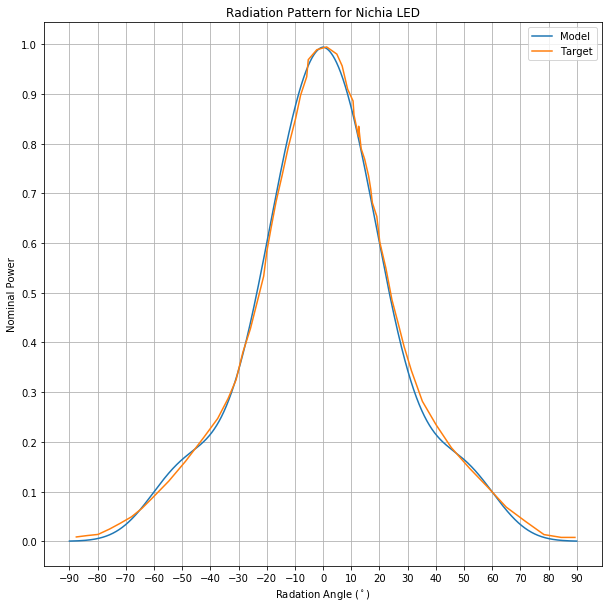

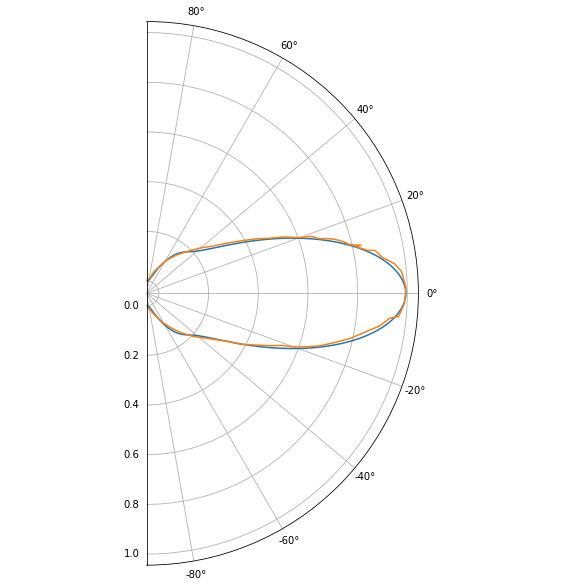

In [6]:
c1 , c2 ,c3 = Cosine_Power_Model.model_param(Param)
ModelPrediction = Cosine_Power_Model.I_calc_cos2(theta , c1 , c2 , c3 )

print("Model Variables")
print("\t   c1 \t\t   c2 \t\t   c3")
for i in range(len(c1)) :
    print("%i. \t %1.3e \t %1.3e \t %1.3e " % (i+1 , c1[i] , c2[i] , c3[i]))
    
plt.figure(figsize= (10,10))
plt.plot(angle , ModelPrediction , label = "Model")
plt.plot(x_axis , y_axis , label = "Target")
plt.xticks(np.arange(-90 , 100 , step = 10))
plt.yticks(np.arange(0,1.1 , step = 0.1))
plt.title("Radiation Pattern for %s LED" % datasheet[:-4])
plt.xlabel("Radation Angle $(^\circ)$")
plt.ylabel("Nominal Power")
plt.legend()
plt.grid()
plt.show()

plt.figure(figsize= (20 ,10 ))
plt.polar(theta , ModelPrediction)
plt.polar(x_axis_rad , y_axis)
plt.xlim(-np.pi/2 , np.pi/2)
plt.show()